<a href="https://colab.research.google.com/github/santhoshml/pyTorch-tutorial/blob/main/torch_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [55]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [56]:
torch.manual_seed(32)
model = Model()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)


In [59]:
my_df['variety'] = my_df['variety'].replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})

In [60]:
X=my_df.drop('variety', axis=1).values
y=my_df['variety'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [63]:
X_train = torch.FloatTensor(X_train)
X_test =  torch.FloatTensor(X_test)

In [64]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [65]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [66]:
epochs = 200
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i%10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.1507450342178345
Epoch: 10 Loss: 0.9371448755264282
Epoch: 20 Loss: 0.7796241641044617
Epoch: 30 Loss: 0.6078532338142395
Epoch: 40 Loss: 0.39894530177116394
Epoch: 50 Loss: 0.2524920105934143
Epoch: 60 Loss: 0.14927689731121063
Epoch: 70 Loss: 0.10029558837413788
Epoch: 80 Loss: 0.08100690692663193
Epoch: 90 Loss: 0.07216039299964905
Epoch: 100 Loss: 0.06702519208192825
Epoch: 110 Loss: 0.06347121298313141
Epoch: 120 Loss: 0.06077784672379494
Epoch: 130 Loss: 0.05864360183477402
Epoch: 140 Loss: 0.05689997598528862
Epoch: 150 Loss: 0.05543999373912811
Epoch: 160 Loss: 0.05419067665934563
Epoch: 170 Loss: 0.05310143530368805
Epoch: 180 Loss: 0.052137620747089386
Epoch: 190 Loss: 0.05127498134970665


Text(0.5, 0, 'Epoch')

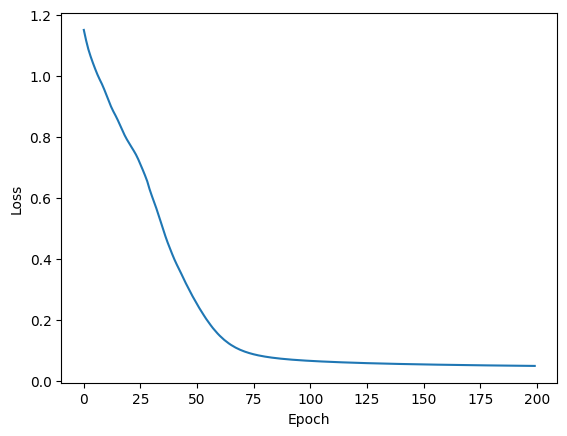

In [67]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [68]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [69]:
loss

tensor(0.0439)

In [70]:
new_iris = torch.Tensor([[5.1, 3.5, 1.4, 0.2]])

In [73]:
with torch.no_grad():
    prediction = model.forward(new_iris)
    print(str(prediction))

tensor([[  8.9539,   1.1038, -13.4866]])


In [74]:
torch.save(model.state_dict(), 'iris_model.pt')

In [75]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [76]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)